### Summary
In this notebook, we try different hyper-parameters and compare their performance. The metrics we used are accuracy rate and cost for test set. Following the instruction, we use "partial accuracy rate" as metrics - partial credits are given to wrong labels depending how many timestep instances are correctly predicted. With different experiments done on hyper-parameters, I try to draw conclusion on the choice of hyper-parameters. To save time, the experiments generally use 40 minibatch for each training epoch and the number of epoch is set to be 20.

### Remark
By default, I deploy the technique of minibatch given its self-explanatory advantage over the naive iteration of each data point. Minibatch could lead to faster convergence compared with gradient descent. At the same time it better leverage the computational efficiency from vectorisation compared with stochastic gradient descent. The technique serves as an optimisation/ balance on convergence speed and computational speed.

In [11]:
from macro_util import *
import matplotlib.pyplot as plt
%matplotlib inline

FILENAME = 'data/data.txt'

### Base Result
Using most default setup, accuracy for test set is only around 62.5%.

x shape = (5000, 8, 2)
y shape = (5000, 8)
train_x shape = (2560, 8, 2)
train_y shape = (2560, 8)
test_x shape = (1000, 8, 2)
test_y shape = (1000, 8)
test accuracy: 0.6246
test loss: 4.5604


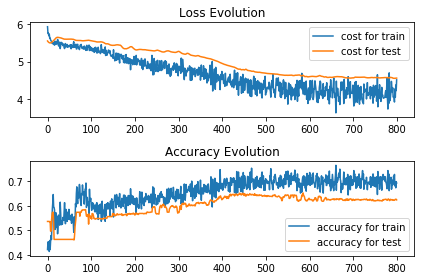

In [12]:
hyperparam_cache = {'filename': FILENAME,
                                'batch_size': 64,
                                'n_mb': 40,
                                'num4test': 1000,
                                'n_epoch': 20,
                                'is_flip': False,
                                'hidden_dims': [4],
                                'hidden_activation': 'sigmoid',
                                'init_method': 'naive',
                                'lr': 0.01, 
                                'opt_method': 'adam',
                                'is_print_metrics': False,
                                'shuff_seed': None}
macro_run(hyperparam_cache)

### Flipping Greatly Improves Accuracy
When data x, y are flipped upside down, the test accuracy improved significantly to 83.0%. It is because the timestep instance is read from top to bottom by default of tensorflow setting. It assumes that the instance at timestep of upper level depends on the instance at timestep of lower level. In binary arithmetic rule, the number on left actually depends on the number on right. Hence, it makes sense to flip a timestep data upside down. e.g. Changing a timestep data from [0,1,0,0,0,0,0,0] to [0,0,0,0,0,0,1,0].

Also, the dependency of binary arithmetic rule is localised, meaning that a number at timestep t only depends on the one at timestep (t-1). Therefore, we don't have a concern about long-distant dependence.

x and y are flipped upsided down
x shape = (5000, 8, 2)
y shape = (5000, 8)
train_x shape = (2560, 8, 2)
train_y shape = (2560, 8)
test_x shape = (1000, 8, 2)
test_y shape = (1000, 8)
test accuracy: 0.8301
test loss: 3.1117


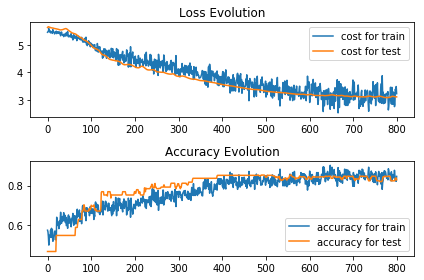

In [13]:
hyperparam_cache = {'filename': FILENAME,
                                'batch_size': 64,
                                'n_mb': 40,
                                'num4test': 1000,
                                'n_epoch': 20,
                                'is_flip': True,
                                'hidden_dims': [4],
                                'hidden_activation': 'sigmoid',
                                'init_method': 'naive',
                                'lr': 0.01, 
                                'opt_method': 'adam',
                                'is_print_metrics': False,
                                'shuff_seed': None}
macro_run(hyperparam_cache)

### Tanh Activation Further Improves Accuracy
With flipping, the choice of tanh activation function in hidden layers further improves the test accuracy to 89.2%. It is because sigmoid activation function is easily saturated and hence fall into the issue of vanishing gradient. The issue would hinder the model from learning. Thanks to the curvature of tanh activation, It is less likely to have the issue of vanishing gradient compared to sigmoid activation function. Therefore, the choice of tanh as activation function could improves the model performance.

x and y are flipped upsided down
x shape = (5000, 8, 2)
y shape = (5000, 8)
train_x shape = (2560, 8, 2)
train_y shape = (2560, 8)
test_x shape = (1000, 8, 2)
test_y shape = (1000, 8)
test accuracy: 0.8924
test loss: 2.3907


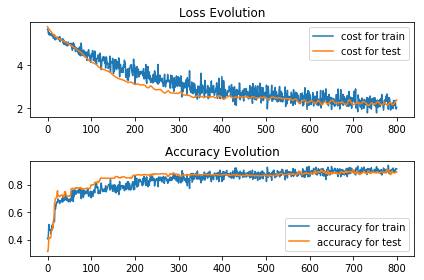

In [25]:
hyperparam_cache = {'filename': FILENAME,
                                'batch_size': 64,
                                'n_mb': 40,
                                'num4test': 1000,
                                'n_epoch': 20,
                                'is_flip': True,
                                'hidden_dims': [4],
                                'hidden_activation': 'tanh',
                                'init_method': 'naive',
                                'lr': 0.01, 
                                'opt_method': 'adam',
                                'is_print_metrics': False,
                                'shuff_rand': None}
macro_run(hyperparam_cache)

### Using Multiple Hidden Layers Improves Accuracy and Loss
Inheriting the above setup of hyparameters, using multilayers RNN can get the test accuracy very close to 1. When 2 hidden layers are used, the test accuracy is 99.4% and the accuracy improvement at early training stage is significant. When 3 hidden layers are used, the test accuracy is almost 100% and it comes to convergence at the early stage of training. The test loss for both cases are reduced significantly. <br>

When RNN model has more hidden layers, it increases the model complexity so it can learn more complex pattern from the training data. Note that multilayers RNN is easily prone to overfitting. We should make sure the training set are large enough.

x and y are flipped upsided down
x shape = (5000, 8, 2)
y shape = (5000, 8)
train_x shape = (2560, 8, 2)
train_y shape = (2560, 8)
test_x shape = (1000, 8, 2)
test_y shape = (1000, 8)
test accuracy: 0.9936
test loss: 0.2333


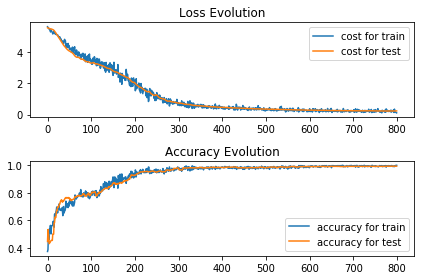

In [15]:
hyperparam_cache = {'filename': FILENAME,
                                'batch_size': 64,
                                'n_mb': 40,
                                'num4test': 1000,
                                'n_epoch': 20,
                                'is_flip': True,
                                'hidden_dims': [4, 4],
                                'hidden_activation': 'tanh',
                                'init_method': 'naive',
                                'lr': 0.01, 
                                'opt_method': 'adam',
                                'is_print_metrics': False,
                                'shuff_seed': None}
macro_run(hyperparam_cache)

x and y are flipped upsided down
x shape = (5000, 8, 2)
y shape = (5000, 8)
train_x shape = (2560, 8, 2)
train_y shape = (2560, 8)
test_x shape = (1000, 8, 2)
test_y shape = (1000, 8)
test accuracy: 1.0000
test loss: 0.0193


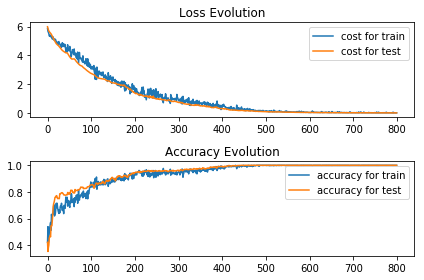

In [16]:
hyperparam_cache = {'filename': FILENAME,
                                'batch_size': 64,
                                'n_mb': 40,
                                'num4test': 1000,
                                'n_epoch': 20,
                                'is_flip': True,
                                'hidden_dims': [4, 4, 4],
                                'hidden_activation': 'tanh',
                                'init_method': 'naive',
                                'lr': 0.01, 
                                'opt_method': 'adam',
                                'is_print_metrics': False,
                                'shuff_seed': None}
macro_run(hyperparam_cache)

### Conclusion
Based on the above experiments, we proposed the following choice of hyperparameters:
- minibatch with shuffling is used 
- learning rate = 0.01
- optimiser = adam
- basic RNN with 3 hidden layers i.e. [4, 4, 4]
- tanh activation function is used in hidden layers
- data x, y are flipped upside down (e.g [0,1,0,0,0,0,0,0] >> [0,0,0,0,0,0,1,0]) 
<br><br>

There are other hyper-parameters worthwhile to be explored, such as the optimiser, learning rate, weight initialisation method, the choice of RNN/ GRU/ LSTM. However, given that the current model gives a satisfactory performance, we are content to stop here from further exploration. 
<br>

In fact, the above experiments have room for more rigor because I only draw conclusion from one single experiment result for each configuration (should have looked at the distribution of experiment result instead) and the hyper-parameters are not completely controlled. I simplified these procedures for sake of simiplicity and convenience.

In [ ]:
# HYPERPARAMETERS FOR FINAL MODEL
hyperparam_cache = {'filename': FILENAME,
                                'batch_size': 64,
                                'n_mb': 40,
                                'num4test': 1000,
                                'n_epoch': 20,
                                'is_flip': True,
                                'hidden_dims': [4, 4, 4],
                                'hidden_activation': 'tanh',
                                'init_method': 'naive',
                                'lr': 0.01, 
                                'opt_method': 'adam',
                                'is_print_metrics': False,
                                'shuff_seed': None}